In [24]:
import torch
import matplotlib.pyplot as plt
from diffusion import DiffusionPipeline
import numpy as np
from diffusion.config import Config
import torchvision
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from diffusion import DiffusionPipeline
from diffusion.config import Config
from contrastive_feature.encoder import ContrastiveEncoder
from contrastive_feature.config import Config as ContrastiveConfig

In [25]:
def imshow(img):
    img = torchvision.utils.make_grid(img)
    img = img / 2 + 0.5  # 反归一化
    img = img.clamp(0, 1)  # clamp到0-1之间
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))  # 转换为正确的图片格式
    plt.show()

In [26]:
config = Config(
    hidden_dim_list=(32, 64, 128)
)


pipe = DiffusionPipeline(device='cuda', config=config)
pipe.from_pretrained('good_unet_ckpt\checkpoint_150_32.pth')

In [27]:
bs=512
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.MNIST('./F_MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('./F_MNIST_data/', download=True, train=False, transform=transform)

testloader = DataLoader(testset, batch_size=bs, shuffle=True)

tensor(4)


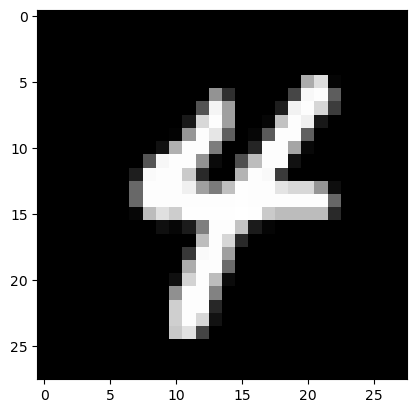

In [50]:
for i, data in enumerate(testloader):
    images, labels = data
    break
label = labels[0]
image = images[0]
print(label)
imshow(image.cpu().unsqueeze(0))

In [29]:
device = 'cuda'
config = ContrastiveConfig(
    in_channels=1,
    out_channels=10,
    hidden_channels=32
)
encoder = ContrastiveEncoder(device, config).to(device)
encoder.load_state_dict(torch.load('exp_20241111-004319_c\checkpoint_30.pth'))

<All keys matched successfully>

In [51]:
new_image = pipe.cond_sample(16, image.unsqueeze(0).cuda(), encoder, 1.5)

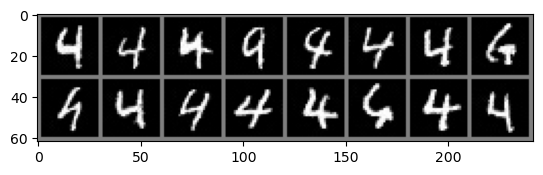

In [52]:
imshow(new_image.cpu())